In [1]:
import pandas as pd

In [2]:
#import the database (from Kaggle)
academy_db=pd.read_csv("Resources/the_oscar_award.csv")
academy_db.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False


--------------------DATA CLEANING--------------------

In [8]:
#award names changed over the years so I combined similar awards in a dictionary
award_combine={'WRITING ORIGINAL':[ 'WRITING (Motion Picture Story)','WRITING (Original Screenplay)',
            'WRITING (Original Motion Picture Story)','WRITING (Story and Screenplay--written directly for the screen)',
            'WRITING (Story and Screenplay)','WRITING (Story and Screenplay--based on factual material or material not previously published or produced)',
            'WRITING (Screenplay Written Directly for the Screen--based on factual material or on story material not previously published or produced)',
            'WRITING (Story and Screenplay--based on material not previously published or produced)', 'WRITING (Screenplay)',
            'WRITING (Original Story)','WRITING (Screenplay--Original)','WRITING (Screenplay Written Directly for the Screen)',
            'WRITING'],
        'WRITING ADAPTED':['WRITING (Adaptation)', 'WRITING (Adapted Screenplay)', 'WRITING (Screenplay--based on material from another medium)',
            'WRITING (Screenplay Based on Material Previously Produced or Published)',
            'WRITING (Screenplay--Adapted)', 'WRITING (Screenplay Based on Material from Another Medium)',
            'WRITING (Screenplay Adapted from Other Material)'],
        'ACTOR':['ACTOR','ACTOR IN A LEADING ROLE'],
        'ACTRESS':['ACTRESS','ACTRESS IN A LEADING ROLE'],
        'BEST PICTURE':['BEST MOTION PICTURE','OUTSTANDING MOTION PICTURE','OUTSTANDING PRODUCTION', 
                        'OUTSTANDING PICTURE','BEST PICTURE'],
        'DIRECTING':['DIRECTING (Comedy Picture)', 'DIRECTING (Dramatic Picture)','DIRECTING'], 
        'COSTUME DESIGN':['COSTUME DESIGN (Black-and-White)', 'COSTUME DESIGN (Color)'],
            'MUSIC SCORE':['MUSIC (Scoring of Music--adaptation or treatment)','MUSIC (Original Music Score)',
           'MUSIC (Original Score--for a motion picture [not a musical])',
           'MUSIC (Score of a Musical Picture--original or adaptation)',
            'MUSIC (Music Score of a Dramatic or Comedy Picture)','MUSIC (Music Score of a Dramatic Picture)',
            'MUSIC (Scoring of a Musical Picture)','MUSIC (Original Dramatic Score)','MUSIC (Original Musical or Comedy Score)',
            'MUSIC (Original Score)','MUSIC (Scoring)',
            'MUSIC (Original Song Score and Its Adaptation -or- Adaptation Score)',
           'MUSIC (Scoring: Adaptation and Original Song Score)',
            'MUSIC (Scoring: Original Song Score and Adaptation -or- Scoring: Adaptation)',
            'MUSIC (Music Score--substantially original)','MUSIC (Adaptation Score)',
            'MUSIC (Original Song Score or Adaptation Score)'],  
        'CINEMATOGRAPHY':['CINEMATOGRAPHY (Black-and-White)',
           'CINEMATOGRAPHY (Color)','CINEMATOGRAPHY'],
        'PRODUCTION DESIGN':['PRODUCTION DESIGN','ART DIRECTION (Black-and-White)', 'ART DIRECTION (Color)','ART DIRECTION'],
        'SOUND EDITING':['SOUND','SOUND EFFECTS','SOUND EDITING','SOUND EFFECTS EDITING'],
        'SPECIAL EFFECTS':['SPECIAL VISUAL EFFECTS','SPECIAL EFFECTS', 'VISUAL EFFECTS'],
        'SOUND MIXING':['SOUND RECORDING', 'SOUND MIXING'],
        'MAKEUP':['MAKEUP', 'MAKEUP AND HAIRSTYLING'],
        'SONG ORIGINAL':['MUSIC (Song)','MUSIC (Song--Original for the Picture)',
                          'MUSIC (Original Song)','MUSIC (Original Song Score)',
                         'MUSIC (Original Song Score and Its Adaptation or Adaptation Score)',
                        ]
        
        }



In [3]:
#droped the following categories that did not overlap with Best Picture
indexNames = academy_db.loc[(academy_db['category'] == 'DOCUMENTARY (Short Subject)') |
                        (academy_db['category'] == 'SPECIAL AWARD') | 
                            (academy_db['category'] =='SHORT SUBJECT (Cartoon)') |
                          (academy_db['category'] == 'SHORT SUBJECT (Comedy)') |
                           (academy_db['category'] == 'SHORT SUBJECT (Novelty)')|
                           (academy_db['category'] == 'SHORT SUBJECT (Color)')|
                           (academy_db['category'] == 'SHORT SUBJECT (One-reel)')|
                           (academy_db['category'] ==  'SHORT SUBJECT (Two-reel)')|
                           (academy_db['category'] == 'IRVING G. THALBERG MEMORIAL AWARD')|
                           (academy_db['category'] ==  'DOCUMENTARY (Short Subject)')|
                           (academy_db['category'] == 'SPECIAL FOREIGN LANGUAGE FILM AWARD')|
                           (academy_db['category'] == 'HONORARY FOREIGN LANGUAGE FILM AWARD')|
                           (academy_db['category'] == 'HONORARY AWARD')|
                           (academy_db['category'] == 'DOCUMENTARY')|
                           (academy_db['category'] == 'DOCUMENTARY (Feature)')|
                           (academy_db['category'] == 'JEAN HERSHOLT HUMANITARIAN AWARD')|
                            (academy_db['category'] == 'SHORT SUBJECT (Live Action)')|
                            (academy_db['category'] == 'SHORT SUBJECT (Animated)')|
                            (academy_db['category'] == 'SPECIAL ACHIEVEMENT AWARD (Visual Effects)')|
                            (academy_db['category'] == 'SHORT FILM (Animated)')|
                            (academy_db['category'] == 'SHORT FILM (Live Action)')|
                           (academy_db['category'] == 'SPECIAL ACHIEVEMENT AWARD (Sound Effects)')|
                           (academy_db['category'] == 'SPECIAL ACHIEVEMENT AWARD (Sound Editing)')|
                           (academy_db['category'] == 'SHORT FILM (Dramatic Live Action)')|
                           (academy_db['category'] == 'ANIMATED FEATURE FILM')|
                           (academy_db['category'] == 'INTERNATIONAL FEATURE FILM')].index


academy_db.drop(indexNames , inplace=True)

In [4]:
#changed value to binary 
academy_db.loc[academy_db["winner"]==False,"winner"]=0
academy_db.loc[academy_db["winner"]==True,"winner"]=1

In [5]:
#adds an empty Type Column
academy_db["category_combined"]=""

In [6]:
#drops any award that doesn't have a film associated with it (this was done as an extra precaution)
academy_db.dropna(subset=['film'],inplace=True)

In [9]:
#adds the combined category value to db

for j, i in academy_db.iterrows():
    found=False
    for x in award_combine:
        if i['category'] in award_combine[x]:
            academy_db['category_combined'][j]=x
            found=True
            break
        if (found==False):
            academy_db['category_combined'][j]=academy_db['category'][j]

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [10]:
#creates a score category with default value 0
academy_db["award_value"]=0

In [11]:
#gives influence weights to categories that will be tallied as an overall score
values=[17,16,15,14,13,12,11,10,40,8,7,6,10,14,31,21,30]
values=values[::-1]

award_combine.keys()
a_value=1
b_value=1
c_value=1.3

award_a_value={'WRITING ORIGINAL':a_value*values[6], 'WRITING ADAPTED':a_value*values[5], 'ACTOR':a_value*values[2], 'ACTRESS':a_value*values[7], 'BEST PICTURE':1, 'DIRECTING':a_value*values[0]}
award_b_value={'CINEMATOGRAPHY':b_value*values[10], 'PRODUCTION DESIGN':b_value*values[3],'FILM EDITING':b_value*values[1],'ACTOR IN A SUPPORTING ROLE':b_value*values[4], 'ACTRESS IN A SUPPORTING ROLE':b_value*values[12]}
award_c_value={'SOUND EDITING':c_value*values[8],'COSTUME DESIGN':c_value*values[9],'COSTUME DESIGN':c_value*values[11], 'MUSIC SCORE':c_value*values[13], 'SONG ORIGINAL':c_value*values[14],
               'SPECIAL EFFECTS':c_value*values[15],'MAKEUP':c_value*values[16]}
  

               

In [12]:
#calculates an overall score for a film

for j,i in academy_db.iterrows():
    if (i['category_combined'] in award_a_value):
        academy_db['award_value'][j]=award_a_value[i['category_combined']]
    elif (i['category_combined'] in award_b_value):
        academy_db['award_value'][j]=award_b_value[i['category_combined']]
    elif (i['category_combined'] in award_c_value):
        academy_db['award_value'][j]=award_c_value[i['category_combined']]
    else:
        academy_db['award_value'][j]=1

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by Interacti

In [14]:
#gets the distinct list of awards for each year
awards_per_year={1928:[]}
current_year=1928
for j, i in academy_db.iterrows():
    if (i['year_ceremony']==current_year):
        if (i['category_combined'] not in awards_per_year[current_year]):
            awards_per_year[current_year].append(i['category_combined'])
    else:
        current_year=i['year_ceremony']
        awards_per_year[current_year]=[i['category_combined']]
        


In [15]:
#groups films by year and category
year_db=academy_db.groupby(['year_ceremony','category_combined']).mean()
year_db.head(5)

year_film  ceremony  award_value
year_ceremony category_combined                                  
1928          ACTOR                   1927         1           31
              ACTRESS                 1927         1            8
              BEST PICTURE            1927         1            1
              CINEMATOGRAPHY          1927         1           11
              DIRECTING               1927         1           30

In [16]:
#gets the total possible award points for each year
year_db=academy_db.groupby(['year_ceremony','category_combined']).mean()

award_value_per_year={1928:0}
current_year=1928

for j, i in year_db.iterrows():
    if (j[0]==current_year):
        award_value_per_year[current_year]=award_value_per_year[current_year]+i['award_value']
    else:
        current_year=j[0]
        award_value_per_year[current_year]=i['award_value']


In [744]:
#goes through to see if movie is nominated in one of these categories
cat_list={'DIRECTING':[], 'FILM EDITING':[], 'ACTOR':[], 'PRODUCTION DESIGN':[], 'ACTOR IN A SUPPORTING ROLE':[], 
          'WRITING ADAPTED':[], 'WRITING ORIGINAL':[], 'ACTRESS':[], 'SOUND EDITING':[], 'COSTUME DESIGN':[],
          'CINEMATOGRAPHY':[], 'SOUND MIXING':[], 'ACTRESS IN A SUPPORTING ROLE':[],
          'MUSIC SCORE':[], 'SONG ORIGINAL':[],
          'SPECIAL EFFECTS':[],'MAKEUP':[],}


   
for cat in cat_list:
    temp_list=academy_db.loc[(academy_db['category_combined']==cat)].reset_index()['film']

    for i in temp_list:
        cat_list[cat].append(i)

#see the list
cat_list

{'DIRECTING': ['Two Arabian Knights',
  'Speedy',
  '7th Heaven',
  'Sorrell and Son',
  'The Crowd',
  'Madame X',
  'The Broadway Melody',
  'In Old Arizona',
  'The Divine Lady',
  'Drag;',
  'The Patriot',
  'Anna Christie;',
  'The Divorcee',
  'The Love Parade',
  'All Quiet on the Western Front',
  'Hallelujah',
  'Cimarron',
  'A Free Soul',
  'The Front Page',
  'Morocco',
  'Skippy',
  'Bad Girl',
  'The Champ',
  'Shanghai Express',
  'Cavalcade',
  'Lady for a Day',
  'Little Women',
  'It Happened One Night',
  'One Night of Love',
  'The Thin Man',
  'Captain Blood',
  'The Informer',
  'The Lives of a Bengal Lancer',
  'Mutiny on the Bounty',
  'Dodsworth',
  'The Great Ziegfeld',
  'Mr. Deeds Goes to Town',
  'My Man Godfrey',
  'San Francisco',
  'The Awful Truth',
  'The Good Earth',
  'The Life of Emile Zola',
  'Stage Door',
  'A Star Is Born',
  'Angels with Dirty Faces',
  'Boys Town',
  'The Citadel',
  'Four Daughters',
  "You Can't Take It with You",
  'Gone wi

In [745]:
#gets a list of all the best pic nominees
best_pic_list=academy_db.loc[(academy_db['category_combined']=='BEST PICTURE')].reset_index()['film']

best_pic_array=[]
for i in best_pic_list:
    best_pic_array.append(i)


In [746]:
#gets a list of all the best pic winners
best_pic_list=academy_db.loc[(academy_db['category_combined']=='BEST PICTURE') &
                            academy_db['winner']==1].reset_index()['film']
best_pic_winners=[]
for i in best_pic_list:
    best_pic_winners.append(i)


In [747]:
#resets the index and puts it in an array
best_pic_list=academy_db.loc[(academy_db['category_combined']=='BEST PICTURE')].reset_index()['film']
best_pic_array=[]
for i in best_pic_list:
    best_pic_array.append(i)


In [748]:
#calculates the average score for best pic per year
film_db=academy_db.groupby(['year_ceremony','film']).sum()

current_year=1928
count=0
best_picture_film_count={1928:0}
num_best_pics={1928:0}

for j, i in film_db.iterrows():
    if (j[0]==current_year):
        if (j[1] in best_pic_array):
            count=count+1
            best_picture_film_count[current_year]=best_picture_film_count[current_year]+i['award_value']
    else:
        best_picture_film_count[current_year]=best_picture_film_count[current_year]/count
        num_best_pics[current_year]=count
        current_year=j[0]
        best_picture_film_count[current_year]=0
        count=0
        if (j[1] in best_pic_array):
            count=count+1
            best_picture_film_count[current_year]=best_picture_film_count[current_year]+i['award_value']
            
num_best_pics[current_year]=count
best_picture_film_count[current_year]=best_picture_film_count[current_year]/count      


In [749]:
#tally the total points for all the best pic winners
film_db=academy_db.groupby(['year_ceremony','film']).sum()

current_year=1928
best_picture_film_total={1928:0}

for j, i in film_db.iterrows():
    if (j[0]==current_year):
        if (j[1] in best_pic_array):
            best_picture_film_total[current_year]=best_picture_film_total[current_year]+i['award_value']
    else:
        current_year=j[0]
        best_picture_film_total[current_year]=0
        count=0
        if (j[1] in best_pic_array):
            best_picture_film_total[current_year]=best_picture_film_total[current_year]+i['award_value']
                 


In [750]:
#creates new db for final evalutation with just best picture films
best_film_db=academy_db.groupby(['year_ceremony','film']).sum()
best_film_db.reset_index(inplace=True)
best_film_db=best_film_db[['film','year_ceremony','award_value']]
indexNames=[]

for j, i in best_film_db.iterrows():
    if (i['film'] not in best_pic_array):
        indexNames.append(j)
    
    

best_film_db.drop(indexNames , inplace=True)


In [751]:
best_film_db

,film,year_ceremony,award_value
0,7th Heaven,1928,59
15,The Racket,1928,1
18,Wings,1928,2
20,Alibi,1929,32
26,Hollywood Revue,1929,1
...,...,...,...
3296,Little Women,2020,61
3298,Marriage Story,2020,78
3299,Once upon a Time...in Hollywood,2020,172
3301,Parasite,2020,73


In [752]:
#add the average score for the year so that the film's score can be compared to it
best_film_db["average_score_for_year"]=""

for j, i in best_film_db.iterrows():
    best_film_db["average_score_for_year"][j]=best_picture_film_count[i['year_ceremony']]
best_film_db

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,film,year_ceremony,award_value,average_score_for_year
0,7th Heaven,1928,59,20.6667
15,The Racket,1928,1,20.6667
18,Wings,1928,2,20.6667
20,Alibi,1929,32,39.3333
26,Hollywood Revue,1929,1,39.3333
...,...,...,...,...
3296,Little Women,2020,61,116.778
3298,Marriage Story,2020,78,116.778
3299,Once upon a Time...in Hollywood,2020,172,116.778
3301,Parasite,2020,73,116.778


In [753]:
#difference between film score and the average score for the year
best_film_db["score_compared_to_avg"]=""

for j, i in best_film_db.iterrows():
    best_film_db["score_compared_to_avg"][j]=best_film_db["award_value"][j]-best_picture_film_count[i['year_ceremony']]
best_film_db.head(10)

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,film,year_ceremony,award_value,average_score_for_year,score_compared_to_avg
0,7th Heaven,1928,59,20.6667,38.3333
15,The Racket,1928,1,20.6667,-19.6667
18,Wings,1928,2,20.6667,-18.6667
20,Alibi,1929,32,39.3333,-7.33333
26,Hollywood Revue,1929,1,39.3333,-38.3333
27,In Old Arizona,1929,73,39.3333,33.6667
34,The Broadway Melody,1929,39,39.3333,-0.333333
38,The Letter,1929,8,39.3333,-31.3333
39,The Patriot,1929,83,39.3333,43.6667
43,All Quiet on the Western Front,1930,49,46.2,2.8


In [754]:
#calculates percentage of total possible award points that the film could have won
best_film_db["percentage_of_total_possible"]=""

for j, i in best_film_db.iterrows():
    best_film_db["percentage_of_total_possible"][j]=best_film_db["award_value"][j]/award_value_per_year[i['year_ceremony']]
best_film_db


/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,film,year_ceremony,award_value,average_score_for_year,score_compared_to_avg,percentage_of_total_possible
0,7th Heaven,1928,59,20.6667,38.3333,0.531532
15,The Racket,1928,1,20.6667,-19.6667,0.00900901
18,Wings,1928,2,20.6667,-18.6667,0.018018
20,Alibi,1929,32,39.3333,-7.33333,0.313725
26,Hollywood Revue,1929,1,39.3333,-38.3333,0.00980392
...,...,...,...,...,...,...
3296,Little Women,2020,61,116.778,-55.7778,0.204013
3298,Marriage Story,2020,78,116.778,-38.7778,0.26087
3299,Once upon a Time...in Hollywood,2020,172,116.778,55.2222,0.575251
3301,Parasite,2020,73,116.778,-43.7778,0.244147


In [755]:
#percentage of total award points for best picture films normalized for 5 films (this adjusted for years with more or less films)
best_film_db["percentage_of_total_awarded_points"]=""

for j, i in best_film_db.iterrows():
    best_film_db["percentage_of_total_awarded_points"][j]=(best_film_db["award_value"][j]/best_picture_film_total[i['year_ceremony']])*num_best_pics[i['year_ceremony']]/5
best_film_db.head()

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,film,year_ceremony,award_value,average_score_for_year,score_compared_to_avg,percentage_of_total_possible,percentage_of_total_awarded_points
0,7th Heaven,1928,59,20.6667,38.3333,0.531532,0.570968
15,The Racket,1928,1,20.6667,-19.6667,0.00900901,0.00967742
18,Wings,1928,2,20.6667,-18.6667,0.018018,0.0193548
20,Alibi,1929,32,39.3333,-7.33333,0.313725,0.162712
26,Hollywood Revue,1929,1,39.3333,-38.3333,0.00980392,0.00508475


In [757]:
#marks 1 if a film is nominated in this category
best_film_db["DIRECTING"]=0
best_film_db["ACTOR"]=0
best_film_db["ACTRESS"]=0
best_film_db['WRITING ADAPTED']=0
best_film_db['WRITING ORIGINAL']=0
best_film_db['FILM EDITING']=0
best_film_db["PRODUCTION DESIGN"]=0
best_film_db["CINEMATOGRAPHY"]=0
best_film_db['COSTUME DESIGN']=0
best_film_db['MAKEUP']=0
best_film_db['ACTOR IN A SUPPORTING ROLE']=0
best_film_db['ACTRESS IN A SUPPORTING ROLE']=0
best_film_db['SOUND MIXING']=0
best_film_db['SOUND EDITING']=0
best_film_db[ 'MUSIC SCORE']=0
best_film_db['SONG ORIGINAL']=0
best_film_db['SPECIAL EFFECTS']=0


In [758]:
#percentage of total award points for best picture film normalized for 5 films
best_film_db["winner"]=0

for j, i in best_film_db.iterrows():
    if (i['film'] in best_pic_winners):
        best_film_db["winner"][j]=1

best_film_db

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,film,year_ceremony,award_value,average_score_for_year,score_compared_to_avg,percentage_of_total_possible,percentage_of_total_awarded_points,DIRECTING,ACTOR,ACTRESS,...,COSTUME DESIGN,MAKEUP,ACTOR IN A SUPPORTING ROLE,ACTRESS IN A SUPPORTING ROLE,SOUND MIXING,SOUND EDITING,MUSIC SCORE,SONG ORIGINAL,SPECIAL EFFECTS,winner
0,7th Heaven,1928,59,20.6667,38.3333,0.531532,0.570968,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,The Racket,1928,1,20.6667,-19.6667,0.00900901,0.00967742,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,Wings,1928,2,20.6667,-18.6667,0.018018,0.0193548,0,0,0,...,0,0,0,0,0,0,0,0,0,1
20,Alibi,1929,32,39.3333,-7.33333,0.313725,0.162712,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,Hollywood Revue,1929,1,39.3333,-38.3333,0.00980392,0.00508475,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3296,Little Women,2020,61,116.778,-55.7778,0.204013,0.104472,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3298,Marriage Story,2020,78,116.778,-38.7778,0.26087,0.133587,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3299,Once upon a Time...in Hollywood,2020,172,116.778,55.2222,0.575251,0.294577,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3301,Parasite,2020,73,116.778,-43.7778,0.244147,0.125024,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [759]:
#adds if a film wins best picture so the model can be trained
for j, i in best_film_db.iterrows():
    for cat in cat_list:
        if (i['film'] in cat_list[cat]):
            best_film_db[cat][j]=1
            


best_film_db.loc[best_film_db['winner']==1]

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,film,year_ceremony,award_value,average_score_for_year,score_compared_to_avg,percentage_of_total_possible,percentage_of_total_awarded_points,DIRECTING,ACTOR,ACTRESS,...,COSTUME DESIGN,MAKEUP,ACTOR IN A SUPPORTING ROLE,ACTRESS IN A SUPPORTING ROLE,SOUND MIXING,SOUND EDITING,MUSIC SCORE,SONG ORIGINAL,SPECIAL EFFECTS,winner
18,Wings,1928,2,20.6667,-18.6667,0.018018,0.0193548,0,0,0,...,0,0,0,0,0,0,0,0,0,1
34,The Broadway Melody,1929,39,39.3333,-0.333333,0.382353,0.198305,1,0,1,...,0,0,0,0,0,0,0,0,0,1
43,All Quiet on the Western Front,1930,49,46.2,2.8,0.475728,0.212121,1,0,0,...,0,0,0,0,0,0,0,0,0,1
69,Cimarron,1931,101,46.6,54.4,0.935185,0.433476,1,1,1,...,0,0,0,0,0,1,0,0,0,1
95,Grand Hotel,1932,1,23,-22,0.00925926,0.00869565,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3166,Spotlight,2016,82,100.125,-18.125,0.273333,0.163795,1,0,0,...,0,0,1,1,0,0,0,0,0,1
3205,Moonlight,2017,110,98.8889,11.1111,0.366667,0.222472,1,0,0,...,0,0,1,1,0,0,1,0,0,1
3248,The Shape of Water,2018,201,84.9,116.1,0.67,0.473498,1,0,1,...,1,0,1,1,1,1,1,0,0,1
3268,Green Book,2019,70,109.375,-39.375,0.233333,0.128,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [761]:
#removes earlier years since they had too few categories
for_analysis_db=best_film_db.set_index('film')
for_analysis_db=for_analysis_db.loc[for_analysis_db['year_ceremony']>=1935]
for_analysis_db

,year_ceremony,award_value,average_score_for_year,score_compared_to_avg,percentage_of_total_possible,percentage_of_total_awarded_points,DIRECTING,ACTOR,ACTRESS,WRITING ADAPTED,...,COSTUME DESIGN,MAKEUP,ACTOR IN A SUPPORTING ROLE,ACTRESS IN A SUPPORTING ROLE,SOUND MIXING,SOUND EDITING,MUSIC SCORE,SONG ORIGINAL,SPECIAL EFFECTS,winner
film,,,,,,,,,,,,,,,,,,,,,
Cleopatra,1935,35,28.1667,6.83333,0.208333,0.248521,0,1,0,0,...,1,0,0,0,1,1,1,0,1,0
Flirtation Walk,1935,2,28.1667,-26.1667,0.0119048,0.0142012,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Here Comes the Navy,1935,1,28.1667,-27.1667,0.00595238,0.00710059,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Imitation of Life,1935,3,28.1667,-25.1667,0.0178571,0.0213018,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
It Happened One Night,1935,76,28.1667,47.8333,0.452381,0.539645,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Little Women,2020,61,116.778,-55.7778,0.204013,0.104472,1,0,1,1,...,1,0,0,1,0,0,1,0,0,0
Marriage Story,2020,78,116.778,-38.7778,0.26087,0.133587,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0
Once upon a Time...in Hollywood,2020,172,116.778,55.2222,0.575251,0.294577,1,1,0,0,...,1,0,1,0,1,1,0,0,0,0


In [763]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [764]:
data = for_analysis_db.drop("winner", axis=1)
feature_names = data.columns
data.head()

,year_ceremony,award_value,average_score_for_year,score_compared_to_avg,percentage_of_total_possible,percentage_of_total_awarded_points,DIRECTING,ACTOR,ACTRESS,WRITING ADAPTED,...,CINEMATOGRAPHY,COSTUME DESIGN,MAKEUP,ACTOR IN A SUPPORTING ROLE,ACTRESS IN A SUPPORTING ROLE,SOUND MIXING,SOUND EDITING,MUSIC SCORE,SONG ORIGINAL,SPECIAL EFFECTS
film,,,,,,,,,,,,,,,,,,,,,
Cleopatra,1935,35,28.1667,6.83333,0.208333,0.248521,0,1,0,0,...,1,1,0,0,0,1,1,1,0,1
Flirtation Walk,1935,2,28.1667,-26.1667,0.0119048,0.0142012,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Here Comes the Navy,1935,1,28.1667,-27.1667,0.00595238,0.00710059,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Imitation of Life,1935,3,28.1667,-25.1667,0.0178571,0.0213018,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
It Happened One Night,1935,76,28.1667,47.8333,0.452381,0.539645,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [765]:
target = for_analysis_db["winner"]
target_names = ["loser", "winner"]

In [766]:
#split data into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [767]:
#run tree model
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)


0.7445255474452555

In [768]:
#run random forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)


0.8905109489051095

In [769]:
#predict results for test sample
predictions=rf.predict(X_test)
test_results_pd=pd.DataFrame({"Prediction": predictions, "Actual": y_test})

In [770]:
#compare the number of predicted winners
print('actual winners:')
a=len(test_results_pd.loc[(test_results_pd['Actual']==1)])
print(a)
b=(len(test_results_pd.loc[(test_results_pd['Prediction']==1) & (test_results_pd['Actual']==1)]))
print('guessed winners:')
print(b)
print('percentage guessed right:')
print (b/a)
test_results_pd.loc[(test_results_pd['Prediction']==1) & (test_results_pd['Actual']==1)]

actual winners:
20
guessed winners:
11
percentage guessed right:
0.55


,Prediction,Actual
film,,
Gone with the Wind,1,1
On the Waterfront,1,1
Titanic,1,1
Ben-Hur,1,1
Patton,1,1
Braveheart,1,1
Rebecca,1,1
Schindler's List,1,1
All the King's Men,1,1


In [771]:
#compare the predicted losers
print('actual losers:')
a=len(test_results_pd.loc[(test_results_pd['Actual']==0)])
print(a)
b=(len(test_results_pd.loc[(test_results_pd['Prediction']==0) & (test_results_pd['Actual']==0)]))
print('guessed loser:')
print(b)
print('percentage guessed right:')
print (b/a)


actual losers:
117
guessed loser:
111
percentage guessed right:
0.9487179487179487


In [772]:
print('guessed wrong')
len(test_results_pd.loc[(test_results_pd['Prediction']!=test_results_pd['Actual'])])

guessed wrong


15

In [773]:
#test influences
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.150289510041065, 'score_compared_to_avg'),
 (0.12905316385179355, 'percentage_of_total_awarded_points'),
 (0.12325179783461636, 'percentage_of_total_possible'),
 (0.11985026695820945, 'award_value'),
 (0.0900519318284383, 'year_ceremony'),
 (0.079392181367893, 'average_score_for_year'),
 (0.028753528663228018, 'DIRECTING'),
 (0.023842543999401344, 'FILM EDITING'),
 (0.022028150212359085, 'WRITING ADAPTED'),
 (0.02183574347959998, 'ACTOR IN A SUPPORTING ROLE'),
 (0.020471461310279628, 'PRODUCTION DESIGN'),
 (0.0200465585667182, 'ACTOR'),
 (0.019034919482696495, 'MUSIC SCORE'),
 (0.018147303808031694, 'SOUND MIXING'),
 (0.016989200713985676, 'COSTUME DESIGN'),
 (0.01607653540399386, 'ACTRESS'),
 (0.01605160094099696, 'WRITING ORIGINAL'),
 (0.015953111221311964, 'ACTRESS IN A SUPPORTING ROLE'),
 (0.014855196638555121, 'CINEMATOGRAPHY'),
 (0.014399534816312407, 'SPECIAL EFFECTS'),
 (0.014306970752648314, 'SONG ORIGINAL'),
 (0.013964628758138658, 'SOUND EDITING'),
 (0.011354159349727047

In [699]:
#number of best pic winners with actor nomination
print('actor nominations for best picture winners:')
print(len(for_analysis_db.loc[(for_analysis_db['ACTOR']==1) & (for_analysis_db['winner']==1)]))
print('actor nominations for best picture losers:')
print(len(for_analysis_db.loc[(for_analysis_db['ACTOR']==1) & (for_analysis_db['winner']==0)]))
print('percentage:')
print(61/196)

actor nominations for best picture winners:
61
actor nominations for best picture losers:
196
percentage:
0.3112244897959184


In [700]:
#number of best pic winners with actress nomination
print('actress nominations for best picture winners:')
print(len(for_analysis_db.loc[(for_analysis_db['ACTRESS']==1) & (for_analysis_db['winner']==1)]))
print('actress nominations for best picture losers:')
print(len(for_analysis_db.loc[(for_analysis_db['ACTRESS']==1) & (for_analysis_db['winner']==0)]))
print('percentage:')
print(30/148)

actress nominations for best picture winners:
30
actress nominations for best picture losers:
148
percentage:
0.20270270270270271


In [701]:
#number of best pic winners with supporting actor nomination
print('ACTOR IN A SUPPORTING ROLE  nominations for best picture winners:')
print(len(for_analysis_db.loc[(for_analysis_db['ACTOR IN A SUPPORTING ROLE']==1) & (for_analysis_db['winner']==1)]))
print('ACTOR IN A SUPPORTING ROLE nominations for best picture losers:')
print(len(for_analysis_db.loc[(for_analysis_db['ACTOR IN A SUPPORTING ROLE']==1) & (for_analysis_db['winner']==0)]))
print('percentage:')
print(52/148)

ACTOR IN A SUPPORTING ROLE  nominations for best picture winners:
52
ACTOR IN A SUPPORTING ROLE nominations for best picture losers:
148
percentage:
0.35135135135135137


In [702]:
#number of best pic winners with supporting actress nomination
print('ACTRESS IN A SUPPORTING ROLE  nominations for best picture winners:')
print(len(for_analysis_db.loc[(for_analysis_db['ACTRESS IN A SUPPORTING ROLE']==1) & (for_analysis_db['winner']==1)]))
print('ACTRESS IN A SUPPORTING ROLE nominations for best picture losers:')
print(len(for_analysis_db.loc[(for_analysis_db['ACTRESS IN A SUPPORTING ROLE']==1) & (for_analysis_db['winner']==0)]))
print('percentage:')
print(37/145)

ACTRESS IN A SUPPORTING ROLE  nominations for best picture winners:
37
ACTRESS IN A SUPPORTING ROLE nominations for best picture losers:
145
percentage:
0.25517241379310346


In [703]:
#number of best pic winners with directing nomination
print('DIRECTING  nominations for best picture winners:')
print(len(for_analysis_db.loc[(for_analysis_db['DIRECTING']==1) & (for_analysis_db['winner']==1)]))
print('DIRECTING nominations for best picture losers:')
print(len(for_analysis_db.loc[(for_analysis_db['DIRECTING']==1) & (for_analysis_db['winner']==0)]))
print('percentage:')
print(92/277)

DIRECTING  nominations for best picture winners:
92
DIRECTING nominations for best picture losers:
277
percentage:
0.33212996389891697


In [704]:
#number of best pic winners with sound editing nomination
print('sound editing  nominations for best picture winners:')
print(len(for_analysis_db.loc[(for_analysis_db['SOUND EDITING']==1) & (for_analysis_db['winner']==1)]))
print('sound editing nominations for best picture losers:')
print(len(for_analysis_db.loc[(for_analysis_db['SOUND EDITING']==1) & (for_analysis_db['winner']==0)]))
print('percentage:')
print(39/94)

sound editing  nominations for best picture winners:
40
sound editing nominations for best picture losers:
95
percentage:
0.4148936170212766


In [705]:
#number of best pic winners with sound mixing nomination
print('sound mixing  nominations for best picture winners:')
print(len(for_analysis_db.loc[(for_analysis_db['SOUND MIXING']==1) & (for_analysis_db['winner']==1)]))
print('sound mixing nominations for best picture losers:')
print(len(for_analysis_db.loc[(for_analysis_db['SOUND MIXING']==1) & (for_analysis_db['winner']==0)]))
print(f"Percentage: {16/92}")

sound mixing  nominations for best picture winners:
16
sound mixing nominations for best picture losers:
97
Percentage: 0.17391304347826086


In [706]:

#number of best pic winners with film editing nomination
print('FILM EDITING  nominations for best picture winners:')
print(len(for_analysis_db.loc[(for_analysis_db['FILM EDITING']==1) & (for_analysis_db['winner']==1)]))
print('FILM EDITING nominations for best picture losers:')
print(len(for_analysis_db.loc[(for_analysis_db['FILM EDITING']==1) & (for_analysis_db['winner']==0)]))
print('percentage:')
print(78/205)

FILM EDITING  nominations for best picture winners:
78
FILM EDITING nominations for best picture losers:
206
percentage:
0.3804878048780488


In [737]:

#number of best pic winners with WRITING ADAPTED nomination
print('WRITING ADAPTED  nominations for best picture winners:')
print(len(for_analysis_db.loc[(for_analysis_db['WRITING ADAPTED']==1) & (for_analysis_db['winner']==1)]))
print('WRITING ADAPTED nominations for best picture losers:')
print(len(for_analysis_db.loc[(for_analysis_db['WRITING ADAPTED']==1) & (for_analysis_db['winner']==0)]))
print('percentage:')
print(43/158)

WRITING ADAPTED  nominations for best picture winners:
43
WRITING ADAPTED nominations for best picture losers:
158
percentage:
0.3804878048780488


In [739]:
#number of best pic winners with 'WRITING ORIGINAL' nomination
print('WRITING ORIGINAL  nominations for best picture winners:')
print(len(for_analysis_db.loc[(for_analysis_db['WRITING ORIGINAL']==1) & (for_analysis_db['winner']==1)]))
print('WRITING ORIGINAL nominations for best picture losers:')
print(len(for_analysis_db.loc[(for_analysis_db['WRITING ORIGINAL']==1) & (for_analysis_db['winner']==0)]))
print('percentage:')
print(47/174)

WRITING ORIGINAL  nominations for best picture winners:
47
WRITING ORIGINAL nominations for best picture losers:
174
percentage:
0.27011494252873564


In [741]:
#number of best pic winners with 'PRODUCTION DESIGN' nomination
print('PRODUCTION DESIGN  nominations for best picture winners:')
print(len(for_analysis_db.loc[(for_analysis_db['PRODUCTION DESIGN']==1) & (for_analysis_db['winner']==1)]))
print('PRODUCTION DESIGN nominations for best picture losers:')
print(len(for_analysis_db.loc[(for_analysis_db['PRODUCTION DESIGN']==1) & (for_analysis_db['winner']==0)]))
print('percentage:')
print(51/175)

PRODUCTION DESIGN  nominations for best picture winners:
51
PRODUCTION DESIGN nominations for best picture losers:
175
percentage:
0.2914285714285714


In [743]:
#number of best pic winners with 'MUSIC SCORE' nomination
print('MUSIC SCORE  nominations for best picture winners:')
print(len(for_analysis_db.loc[(for_analysis_db['MUSIC SCORE']==1) & (for_analysis_db['winner']==1)]))
print('MUSIC SCORE nominations for best picture losers:')
print(len(for_analysis_db.loc[(for_analysis_db['MUSIC SCORE']==1) & (for_analysis_db['winner']==0)]))
print('percentage:')
print(56/191)

MUSIC SCORE  nominations for best picture winners:
56
MUSIC SCORE nominations for best picture losers:
191
percentage:
0.2931937172774869


In [746]:
#number of best pic winners with 'COSTUME DESIGN nomination
print('COSTUME DESIGN  nominations for best picture winners:')
print(len(for_analysis_db.loc[(for_analysis_db['COSTUME DESIGN']==1) & (for_analysis_db['winner']==1)]))
print('COSTUME DESIGN nominations for best picture losers:')
print(len(for_analysis_db.loc[(for_analysis_db['COSTUME DESIGN']==1) & (for_analysis_db['winner']==0)]))
print('percentage:')
print(38/101)

COSTUME DESIGN  nominations for best picture winners:
38
COSTUME DESIGN nominations for best picture losers:
101
percentage:
0.37623762376237624


In [748]:
#number of best pic winners with 'MAKEUP nomination
print('MAKEUP  nominations for best picture winners:')
print(len(for_analysis_db.loc[(for_analysis_db['MAKEUP']==1) & (for_analysis_db['winner']==1)]))
print('MAKEUP nominations for best picture losers:')
print(len(for_analysis_db.loc[(for_analysis_db['MAKEUP']==1) & (for_analysis_db['winner']==0)]))
print('percentage:')
print(11/17)

MAKEUP  nominations for best picture winners:
11
MAKEUP nominations for best picture losers:
17
percentage:
0.6470588235294118


In [750]:

#number of best pic winners with CINEMATOGRAPHY nomination
print('CINEMATOGRAPHY  nominations for best picture winners:')
print(len(for_analysis_db.loc[(for_analysis_db['CINEMATOGRAPHY']==1) & (for_analysis_db['winner']==1)]))
print('CINEMATOGRAPHY nominations for best picture losers:')
print(len(for_analysis_db.loc[(for_analysis_db['CINEMATOGRAPHY']==1) & (for_analysis_db['winner']==0)]))
print('percentage:')
print(59/200)

CINEMATOGRAPHY  nominations for best picture winners:
59
CINEMATOGRAPHY nominations for best picture losers:
200
percentage:
0.295


In [752]:

print('SONG ORIGINAL  nominations for best picture winners:')
print(len(for_analysis_db.loc[(for_analysis_db['SONG ORIGINAL']==1) & (for_analysis_db['winner']==1)]))
print('SONG ORIGINAL nominations for best picture losers:')
print(len(for_analysis_db.loc[(for_analysis_db['SONG ORIGINAL']==1) & (for_analysis_db['winner']==0)]))
print('percentage:')
print(11/49)

SONG ORIGINAL  nominations for best picture winners:
11
SONG ORIGINAL nominations for best picture losers:
49
percentage:
0.22448979591836735


In [754]:

print('SPECIAL EFFECTS  nominations for best picture winners:')
print(len(for_analysis_db.loc[(for_analysis_db['SPECIAL EFFECTS']==1) & (for_analysis_db['winner']==1)]))
print('SPECIAL EFFECTS nominations for best picture losers:')
print(len(for_analysis_db.loc[(for_analysis_db['SPECIAL EFFECTS']==1) & (for_analysis_db['winner']==0)]))
print('percentage:')
print(12/34)

SPECIAL EFFECTS  nominations for best picture winners:
12
SPECIAL EFFECTS nominations for best picture losers:
34
percentage:
0.35294117647058826


In [713]:
import matplotlib.pyplot as plt
import numpy as np

In [628]:
x=['Actor','Supporting Actor','Supporting Actress','Actress']
y=[61,52,37,30]

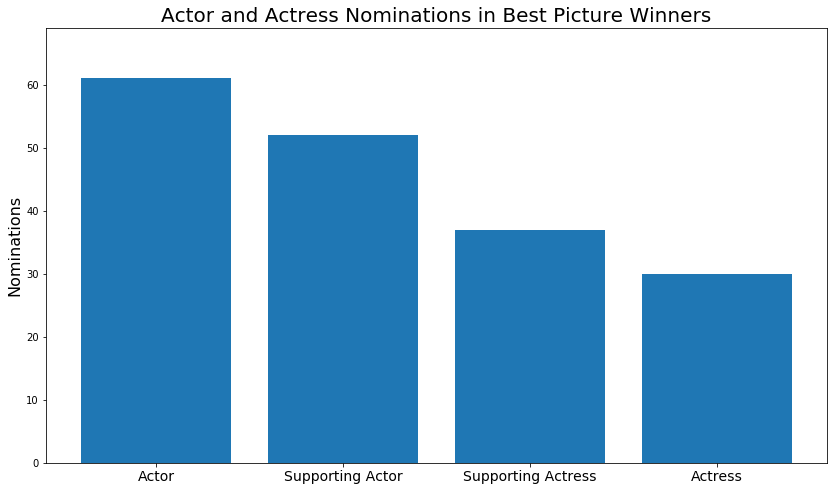

In [735]:

plt.bar(x,y,)
plt.ylim([0, 69])
plt.ylabel('Nominations',fontsize=16)
plt.title('Actor and Actress Nominations in Best Picture Winners',fontsize=20)
plt.rcParams["figure.figsize"] = (14,8)
plt.xticks(fontsize=14)
plt.savefig('actor_nom.png')

In [723]:
actress_noms=for_analysis_db.loc[(for_analysis_db['ACTRESS']==1) & (for_analysis_db['winner']==1)]
actor_noms=for_analysis_db.loc[(for_analysis_db['ACTOR']==1) & (for_analysis_db['winner']==1)]

In [721]:
actress_noms['year_ceremony']

film
Cimarron                                           1931
It Happened One Night                              1935
Mutiny on the Bounty                               1936
The Life of Emile Zola                             1938
Gone with the Wind                                 1940
                                                   ... 
The King's Speech                                  2011
The Artist                                         2012
12 Years a Slave                                   2014
Birdman or (The Unexpected Virtue of Ignorance)    2015
Green Book                                         2019
Name: year_ceremony, Length: 61, dtype: int64

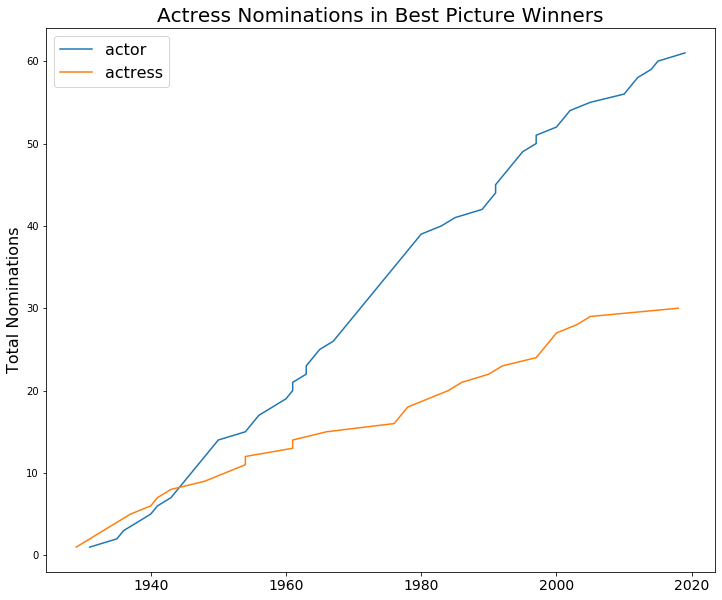

In [786]:

plt.plot(actor_noms['year_ceremony'],np.cumsum(actor_noms['ACTOR']),label="actor")
plt.plot(actress_noms['year_ceremony'],np.cumsum(actress_noms['ACTRESS']),label="actress")
plt.ylabel('Total Nominations',fontsize=16)
plt.title('Actress Nominations in Best Picture Winners',fontsize=20)
plt.legend(loc="upper left",prop={'size': 16})
plt.rcParams["figure.figsize"] = (12,8)
plt.xticks(fontsize=14)
plt.savefig('actor_nom_line.png')